In [1]:
# 기본 환경 로드
%run ./env.ipynb

# Fit Data Model

ETL를 통해 생성된 데이터셋을 이용하여 훈련을 통해 데이터 모델을 생성합니다.

DNN 모델과 비교를 위해 RandomForest 모델을 훈련해봅니다.

In [2]:
from utils import *

sdate = get_env_sdate(default = "2018070108")
path_base = get_env_path_base(default = "/root/mnt/dfs/notebooks-skp/mnist")
path_data = get_env_path_date(default = "/root/mnt/dfs/data/mnist")

print("sdate: {}".format(sdate))
print("path_base: {}".format(path_base))
print("path_data: {}".format(path_data))

sdate: 2018070108
path_base: /root/mnt/dfs/notebooks-skp/mnist
path_data: /root/mnt/dfs/data/mnist


In [3]:
# 데이터 로드
import os
from sklearn.externals import joblib 

path_etl = os.path.join(path_data, "etl")
path_etl_sdate = os.path.join(path_etl, sdate)

path_train_xs = os.path.join(path_etl_sdate, "rf-train_xs.pkl")
path_train_ys = os.path.join(path_etl_sdate, "rf-train_ys.pkl")
np_train_xs = joblib.load(path_train_xs)
np_train_ys = joblib.load(path_train_ys)
print(np_train_xs.shape, np_train_ys.shape)

path_test_xs = os.path.join(path_etl_sdate, "rf-test_xs.pkl")
path_test_ys = os.path.join(path_etl_sdate, "rf-test_ys.pkl")
np_test_xs = joblib.load(path_test_xs)
np_test_ys = joblib.load(path_test_ys)
print(np_test_xs.shape, np_test_ys.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
dim_x = np_train_xs.shape[1]
n_class = 10

In [5]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=6)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(np_train_xs, np_train_ys)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
np_pred_ys = clf.predict(np_test_xs)

In [7]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print("\n")
print(classification_report(np_test_ys, np_pred_ys))



             precision    recall  f1-score   support

          0       0.94      0.99      0.96       980
          1       0.98      0.99      0.99      1135
          2       0.92      0.95      0.93      1032
          3       0.93      0.94      0.93      1010
          4       0.94      0.94      0.94       982
          5       0.95      0.92      0.94       892
          6       0.97      0.96      0.96       958
          7       0.96      0.94      0.95      1028
          8       0.94      0.92      0.93       974
          9       0.94      0.92      0.93      1009

avg / total       0.95      0.95      0.95     10000



전반적으로 DNN 모델보다 낮은 결과를 보여줌.

Feature ranking:
1. feature 461 (0.013114)
2. feature 407 (0.012046)
3. feature 350 (0.011573)
4. feature 409 (0.010725)
5. feature 406 (0.009718)
6. feature 596 (0.009661)
7. feature 405 (0.009628)
8. feature 211 (0.009123)
9. feature 464 (0.009107)
10. feature 291 (0.009090)
11. feature 428 (0.009062)
12. feature 238 (0.008872)
13. feature 271 (0.008359)
14. feature 183 (0.007793)
15. feature 514 (0.007386)
16. feature 542 (0.007308)
17. feature 380 (0.007260)
18. feature 378 (0.007082)
19. feature 493 (0.006797)
20. feature 345 (0.006776)


<Figure size 1008x1008 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7f5b1af3a4e0>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

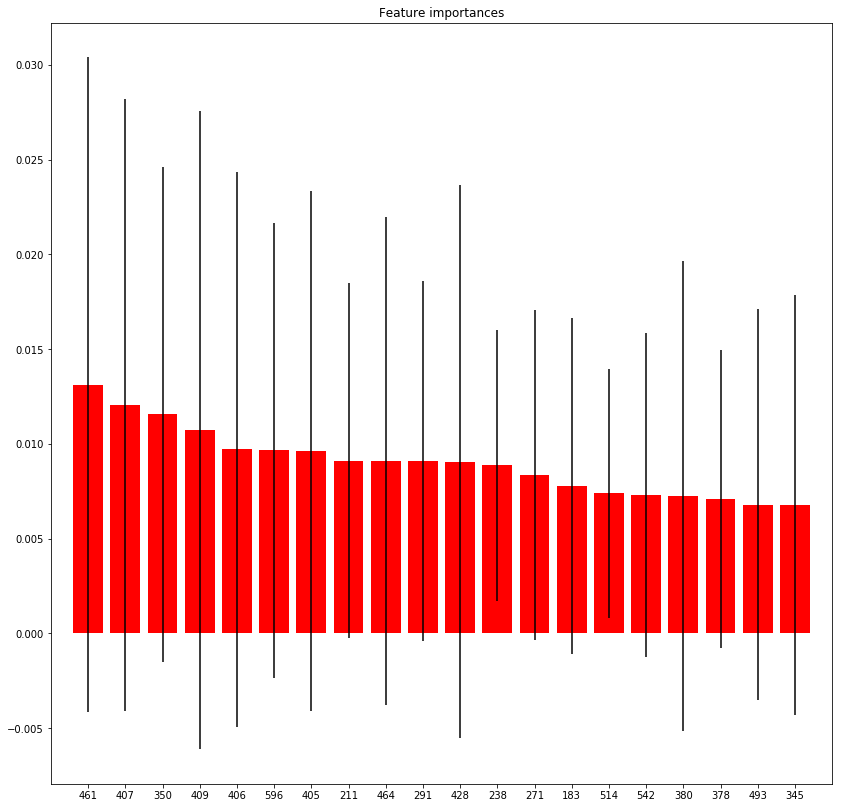

In [8]:
# RandomForest를 통해 얻은 Importance Feature를 출력해봅니다.

top = 20

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:top]

# Print the feature ranking
print("Feature ranking:")

for i, f in enumerate(range(np_train_xs.shape[1])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    if (i >= top-1):
        break

# Plot the feature importances of the forest
from IPython.core.pylabtools import figsize
figsize(14, 14)

plt.figure()
plt.title("Feature importances")
plt.bar(range(top), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(top), indices)
plt.xlim([-1, top])
plt.show()

이미지에서 숫자 부분이 중간 부분에 위치하기 때문에 주요 feature 가 중앙 위치에서 뽑힌 것을 볼 수 있습니다.